In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg
import import_ipynb
from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest as ztest

1.25.2
2.0.3
3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


/home/am275/.conda/envs/Jupyter-notebook/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Generate Holin Mutants Around the Neighbourhood of Radius $r_c=7$ at Mutation Position I21

In [5]:
import re

AA_dict = {'Non_polar': ['G', 'A', 'V', 'C', 'W'],
           'Polar': ['S', 'T', 'Y', 'N', 'Q'],
           'Charged': ['K', 'R', 'H', 'D', 'E']}

def generate_holin_mutants(wt_seq, mutant, radius, mutant_dict):
    # Extract the position and convert it to an integer
    numbers = re.findall(r'\d+', mutant)
    position = int(numbers[0]) if numbers else None

    if position is None or position < 1 or position > len(wt_seq):
        print("Invalid mutation position.")
        return

    # Map the mutant name according to the provided dictionary
    mapped_mutant = mutant_dict.get(mutant, mutant)

    # Print the wild-type sequence around the mutation point of radius R
    start_wt = max(position - radius - 1, 0)
    end_wt = min(position + radius, len(wt_seq))
    mut_wt_seq = list(wt_seq)
    for key, value in mutant_dict.items():
        if value == mapped_mutant:
            mutant = key
            break
    mut_wt_seq[position - 1] = wt_seq[position - 1]
    mut_wt_seq = ''.join(mut_wt_seq)
    wt_sequence = mut_wt_seq[start_wt:end_wt]

    # Print the mutation sequence around the mutation point of radius R
    start_mut = max(position - radius - 1, 0)
    end_mut = min(position + radius, len(wt_seq))
    mut_seq = list(wt_seq)
    mut_seq[position - 1] = mapped_mutant[-1]
    mut_seq = ''.join(mut_seq)
    mutated_seq = mut_seq[start_mut:end_mut]

    #print(f"Wild-type sequence around position {position} with a radius of {radius}:")
    #print(f">{mutant}\n{wt_sequence}")

    #print(f"Mutation sequence around position {position} with a radius of {radius}:")
    print(f">{mutant}\n{mutated_seq}")

# Example usage
wt_seq = 'MKMPEKHDLLAAILAAKEQGIGAILAFAMAYLRGRYNGGAFTKTVIDATMCAIIAWFIRDLLDFAGLSSNLAYITSVFIGYIGTDSIGSLIKRFAAKKAGVEDGRNQ'
radius = 7
mutant_dict = {
    "I21V": "I21V",
    "I21G": "I21G",
    "I21A": "I21A",
    "I21C": "I21C",
    "I21P": "I21P",
    "I21L": "I21L",
    "I21M": "I21M",
    "I21W": "I21W",
    "I21F": "I21F",
    "I21S": "I21S",
    "I21T": "I21T",
    "I21Y": "I21Y",
    "I21N": "I21N",
    "I21Q": "I21Q",
    "I21K": "I21K",
    "I21R": "I21R",
    "I21H": "I21H",
    "I21D": "I21D",
    "I21E": "I21E",
    "I21I": "I21I",
}

for mutant in mutant_dict.values():
    generate_holin_mutants(wt_seq, mutant, radius, mutant_dict)


>I21V
LAAKEQGVGAILAFA
>I21G
LAAKEQGGGAILAFA
>I21A
LAAKEQGAGAILAFA
>I21C
LAAKEQGCGAILAFA
>I21P
LAAKEQGPGAILAFA
>I21L
LAAKEQGLGAILAFA
>I21M
LAAKEQGMGAILAFA
>I21W
LAAKEQGWGAILAFA
>I21F
LAAKEQGFGAILAFA
>I21S
LAAKEQGSGAILAFA
>I21T
LAAKEQGTGAILAFA
>I21Y
LAAKEQGYGAILAFA
>I21N
LAAKEQGNGAILAFA
>I21Q
LAAKEQGQGAILAFA
>I21K
LAAKEQGKGAILAFA
>I21R
LAAKEQGRGAILAFA
>I21H
LAAKEQGHGAILAFA
>I21D
LAAKEQGDGAILAFA
>I21E
LAAKEQGEGAILAFA
>I21I
LAAKEQGIGAILAFA


# Calculate mean hydrophobicity of  sub-sequence of length $2r_c+1(r_c=7)$ (Wimley-White Scale)

## Wimley, W. C.; White, S. H. Experimentally determined hydrophobicity scale for proteins at membrane interfaces. Nat. Struct. Biol. 1996, 3, 842–848.

In [2]:
# Define the Wimley-White hydrophobicity scale as a dictionary
hydrophobicity_scale = {
    'A': 0.17, 'R': 0.81, 'N': 0.42, 'D': 1.23, 'C': -0.24,
    'Q': 0.58, 'E': 2.02, 'G': 0.01, 'H': 0.96, 'I': -0.31,
    'L': -0.56, 'K': 0.99, 'M': -0.23, 'F': -1.13, 'P': 0.45,
    'S': 0.13, 'T': 0.14, 'W': -1.85, 'Y': -0.94, 'V': 0.07
}

def calculate_hydrophobicity_and_mean(protein_sequence):
    hydrophobicity = 0.0
    num_aa = 0
    for aa in protein_sequence:
        if aa in hydrophobicity_scale:
            hydrophobicity += hydrophobicity_scale[aa]
            num_aa += 1
    if num_aa != 0:
        mean_hydrophobicity = hydrophobicity / num_aa
    else:
        mean_hydrophobicity = None
    return hydrophobicity, mean_hydrophobicity

# Read sequences from file
with open("holin_virtually_mutated_seq.txt", "r") as file:
    sequences = [line.strip() for line in file if not line.startswith(">")]

# Calculate and print average hydrophobicity for each sequence
print(f"Avg_Hydrophobicity")
for sequence in sequences:
    hydrophobicity, _ = calculate_hydrophobicity_and_mean(sequence)
    num_aa = len(sequence)
    average_hydrophobicity = hydrophobicity / num_aa
    #print(f"Average hydrophobicity for sequence '{sequence}': {average_hydrophobicity}")
    print(f"{average_hydrophobicity:.3f}")
    

Avg_Hydrophobicity
0.106
0.131
0.127
0.138
0.111
0.157
0.089
0.111
0.003
0.051
0.135
0.136
0.064
0.155
0.165
0.193
0.181
0.191
0.209
0.261


# Prediction of mean lysis times for arbitrary mutations based on mean hydrophobicity values at position I21 (2D contour plot)

/tmp/ipykernel_2089240/4074392806.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


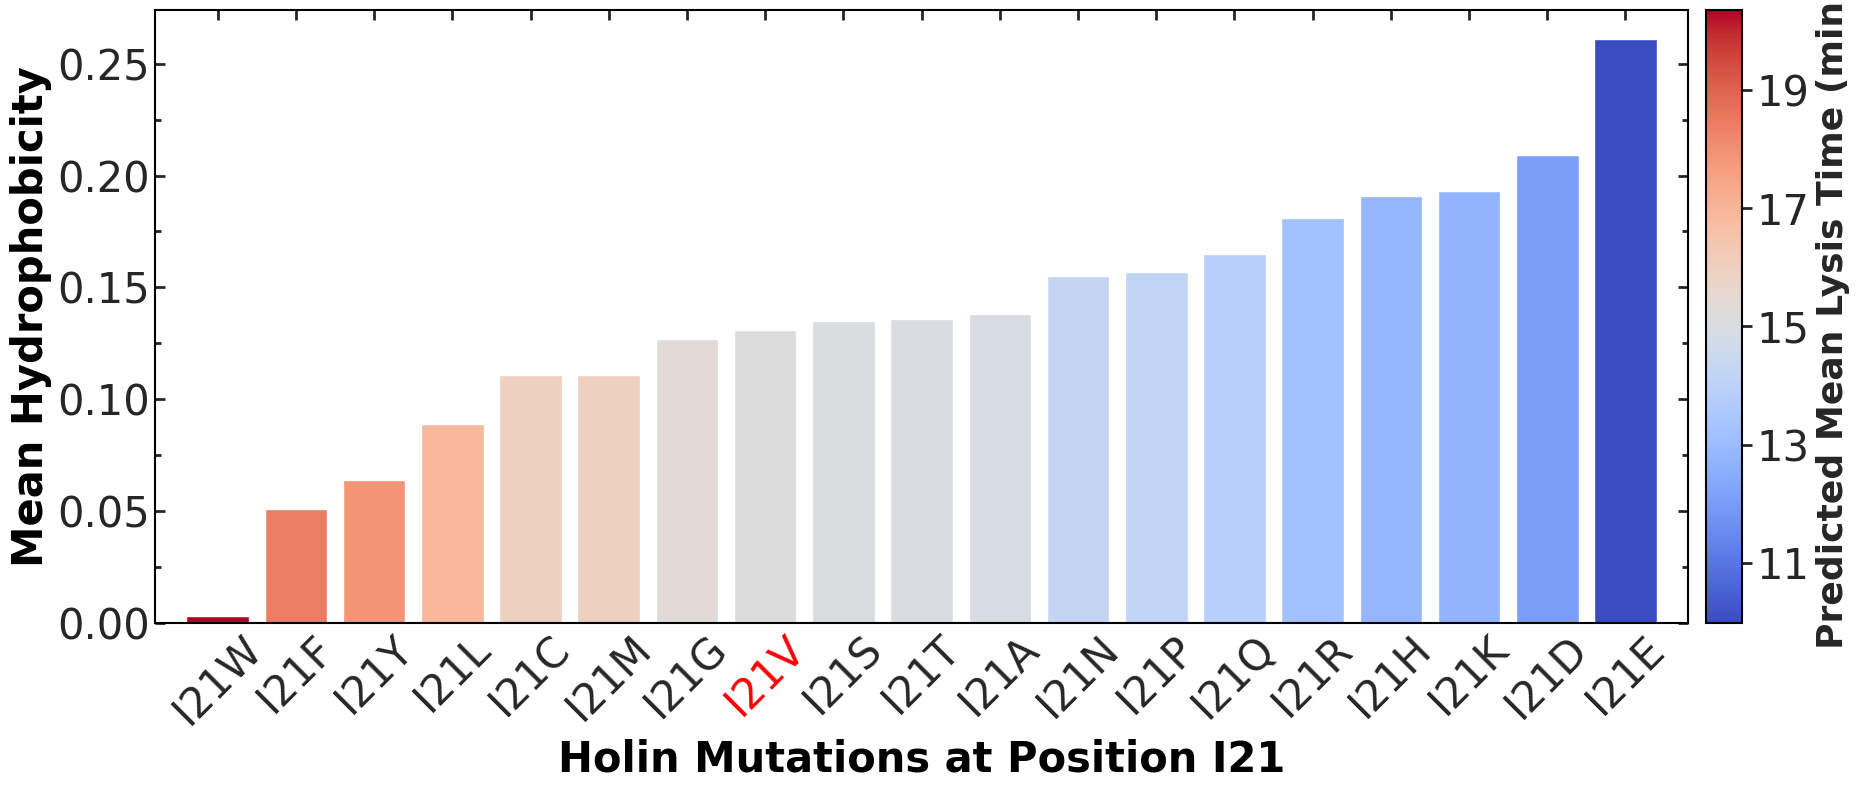

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.ticker import AutoMinorLocator
import numpy as np

# Read data from file
data_file = "Average_Local_Hydrophobicity.txt"
average_slope = -181.82
average_intercept = 92.64
scaling_factor = 0.221

mutants = []
mean_hydrophobicity = []

with open(data_file, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split()
        mutants.append(parts[0])
        mean_hydrophobicity.append(float(parts[1]))

# Sort the data by mean hydrophobicity
sorted_indices = sorted(range(len(mean_hydrophobicity)), key=lambda k: mean_hydrophobicity[k])
mutants = [mutants[i] for i in sorted_indices]
mean_hydrophobicity = [mean_hydrophobicity[i] for i in sorted_indices]

# Calculate mfpt_predicted values
mfpt_predicted_values = [((average_slope * hydrophobicity + average_intercept) * scaling_factor) for hydrophobicity in mean_hydrophobicity]

# Define colormap
#cmap = plt.cm.get_cmap('RdYlBu')
#cmap = plt.cm.get_cmap('RdYlGn_r')
#cmap = plt.cm.get_cmap('bwr_r')
cmap = plt.cm.get_cmap('coolwarm')
norm = Normalize(vmin=min(mfpt_predicted_values), vmax=max(mfpt_predicted_values))

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

for mutant, hydrophobicity, mfpt_predicted in zip(mutants, mean_hydrophobicity, mfpt_predicted_values):
    color = cmap(norm(mfpt_predicted))
    ax.bar(mutant, hydrophobicity, color=color, alpha=1.0)
    
#for mutant, hydrophobicity, mfpt_predicted in zip(mutants, mean_hydrophobicity, mfpt_predicted_values):
#    if mutant != "I21V":  # Excluding "D85G" mutant
#        color = cmap(norm(mfpt_predicted))
#        ax.bar(mutant, hydrophobicity, color=color, alpha=1.0)


ax.set_xlabel('Holin Mutations at Position I21', fontsize=30, color='black', fontweight='bold')
ax.set_ylabel('Mean Hydrophobicity', fontsize=30, color='black', fontweight='bold')
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
# Change color of x-axis tick label for "I21V"
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    if label.get_text() == "I21V":
        label.set_color('red')
#ax.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=25)
#ax.tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=25)

plt.tick_params(axis='x', which='major', bottom=False, top=True, direction='in', labelsize=30, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=30, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=30, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=30, width=2, length=4)

# Add panel label "A"
#ax.text(-0.096, 1.1, "A", transform=ax.transAxes, fontsize=45, fontweight='bold', va='top')

ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
ax.set_xlim(-0.8, 18.8)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.01, aspect=17)  # Adjust the pad value as needed
#cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Predicted Mean Lysis Time (min)', fontsize=26, fontweight='bold')
cbar.ax.tick_params(labelsize=30, width=2, length=7)
#cbar.set_ticks([45, 50, 55, 60, 65, 70, 75])
cbar.set_ticks([11, 13, 15, 17, 19])
plt.grid(False)
plt.tight_layout()
#plt.savefig('Fig7A_R7.pdf', bbox_inches='tight')
plt.show()
